In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('../dataFiles/Position_Salaries.csv')
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


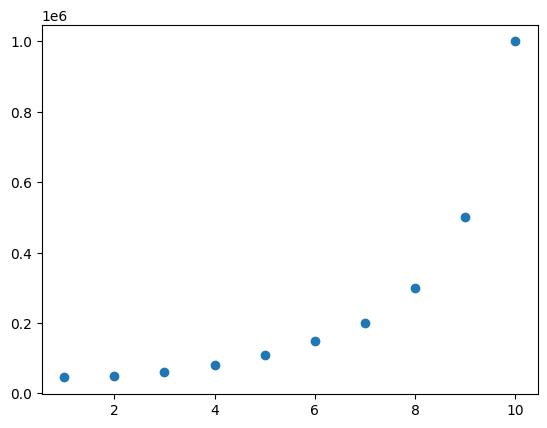

In [20]:
X = data.iloc[:,1:2].values  
y = data.iloc[:,2].values  

plt.scatter(X, y)
plt.show()

In [31]:
# Define the initial polynomial coefficients.
theta = np.zeros(X.shape[1])

# Set the learning rate.
alpha = 0.01

# Perform gradient descent.
for i in range(1000):
  predictions = np.dot(X, theta)
  errors = predictions - y

  # Calculate the gradients.
  gradients = np.dot(X.T, errors) / len(y)

  # Update the polynomial coefficients.
  theta -= alpha * gradients

# Make predictions.
predictions = np.dot(X, theta)

# Evaluate the model.
mse = np.sum((predictions - y)**2) / len(y)
print('Mean squared error:', mse)

Mean squared error: 0.8349451966473243


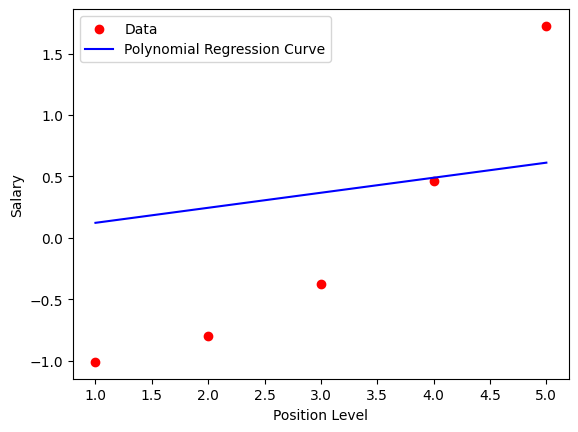

In [34]:

# Create a set of X values for the polynomial regression curve.
X_curve = np.linspace(min(X), max(X), 100)
X_curve_poly = X_curve
for i in range(2, len(theta)):
    X_curve_poly = np.column_stack((X_curve_poly, X_curve ** i))

# Calculate predictions for the polynomial regression curve.
predictions_curve = np.dot(X_curve_poly, theta)

# Scatter plot of the data points.
plt.scatter(X, y, color='red', label='Data')

# Plot the polynomial regression curve.
plt.plot(X_curve, predictions_curve, color='blue', label='Polynomial Regression Curve')

plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../dataFiles/housePrices.csv")

# Extract the features (X) and target variable (y)
X = data['bedroom'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

# Feature scaling (optional but recommended)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add polynomial features (e.g., quadratic)
degree = 2  # You can adjust the degree as needed
X_poly = np.hstack([X**i for i in range(1, degree + 1)])

# Add a column of ones for the bias term
X_b = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]

learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Initialize coefficients
theta = np.random.rand(degree + 2, 1)  # degree + 1 features + bias

# Perform gradient descent
for iteration in range(n_iterations):
    # Calculate predictions
    predictions = X_b.dot(theta)

    # Calculate the error
    error = predictions - y

    # Calculate gradients
    gradients = 2/m * X_b.T.dot(error)

    # Update the coefficients using the gradients
    theta = theta - learning_rate * gradients

# Print the final coefficients
print("Final Coefficients:")
print(theta)

# Visualize the results
plt.scatter(X, y, label='Actual data')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Generate points for the polynomial curve
X_poly_fit = np.linspace(X.min(), X.max(), 100)
X_poly_fit = X_poly_fit.reshape(-1, 1)
X_poly_fit = np.hstack([X_poly_fit**i for i in range(1, degree + 1)])

# Predict the prices for the fitted polynomial curve
y_poly_fit = X_poly_fit.dot(theta[1:]) + theta[0]

# Plot the regression curve
plt.plot(X_poly_fit, y_poly_fit, color='r', label='Polynomial Regression')

plt.title('Polynomial Regression with Gradient Descent (Bedrooms and Price)')
plt.legend()
plt.show()


ValueError: shapes (5,3) and (4,1) not aligned: 3 (dim 1) != 4 (dim 0)